This is a prototyping notebook for cell imaging analysis

In [1]:
# Imports
from skimage import io
from skimage.filters import gaussian
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import expon

In [2]:
# Set data directory
#data_dir = '/shared-data/research/cell-imaging/220803 BC images for ABM/20x TIFs by well, channel, containing Z stacks/'
data_dir = '/shared-data/research/cell-imaging/220803 BC images for ABM/20x TIFs, MIPs/561 TMRM/'

# Chose file to play with
#fname = '24w 20x SD_A2_561 SD.tif'  # 561 is the mito. stain, clearest morphology
fname = '561 TMRM-0021.tif'  # 561 is the mito. stain, clearest morphology

# Read image file
im = io.imread(data_dir + fname)

In [3]:
# Z-score the image
im = im - im.flatten().mean()
im = im / im.flatten().std()

In [4]:
# Smooth with Gaussian kernel
#im = gaussian(im, sigma=1.5)

(0, 15)

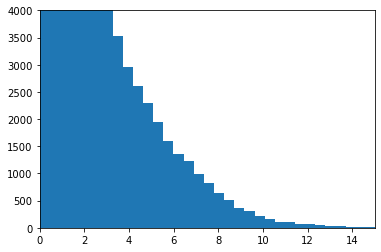

In [5]:
# Plot histogram of pixel values
plt.hist(im.flatten(), bins=50)
plt.ylim([0, 4e3])
plt.xlim([0, 15])

In [6]:
plt.rcParams["figure.figsize"] = [10,10]

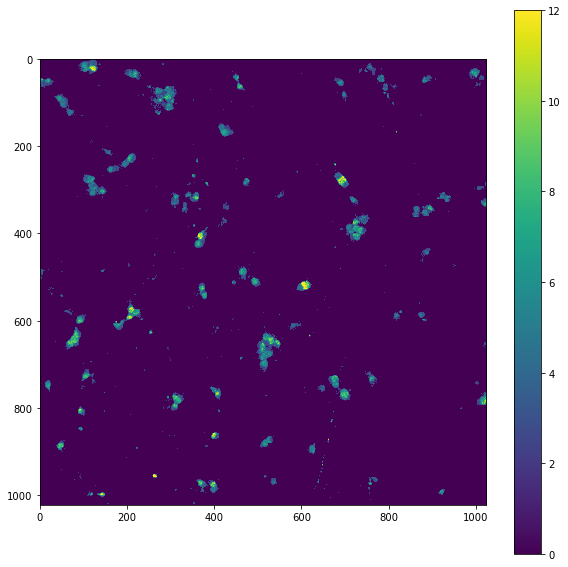

In [7]:
# Show thresholded image
thresh_im = im.copy()
thresh_im[thresh_im < 2] = 0
plt.imshow(thresh_im)
plt.colorbar()
plt.clim([0, 12])

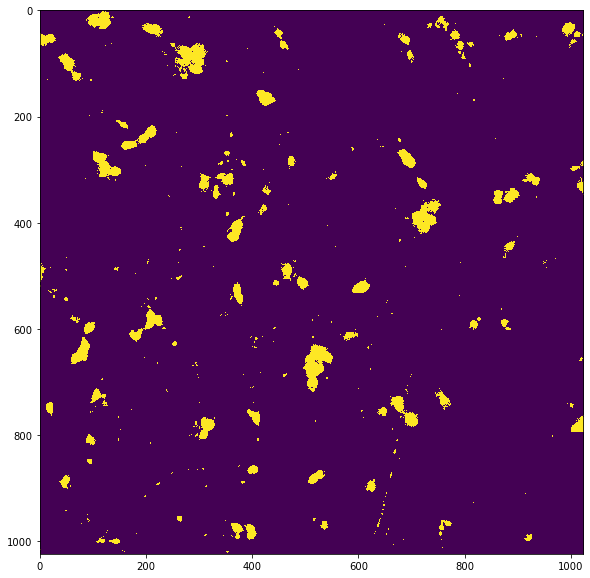

In [8]:
# Show mask
thresh_im[thresh_im >= 2] = 1
plt.rcParams["figure.figsize"] = [10,10]
plt.imshow(thresh_im)

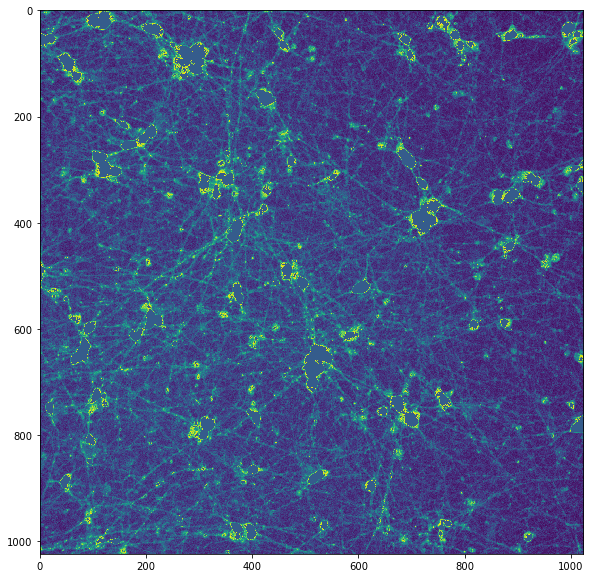

In [9]:
# Show complement of thresholded image
thresh_im = im.copy()
thresh_im[thresh_im >= 2] = 0
plt.rcParams["figure.figsize"] = [10,10]
plt.imshow(thresh_im)